In [2]:
!pip install copulas

     ---------------------------------------- 51.9/51.9 KB 2.6 MB/s eta 0:00:00


You should consider upgrading via the 'D:\2023\venv\nanogpt\Scripts\python.exe -m pip install --upgrade pip' command.


# pypi copulas 예제  
- 두 독립적인 상이한 분포를 결합하여 어떤 분포를 만들고 여기서 데이터를 샘플링하는 예제
- 여기서 보이지는 않지만, 어떤 데이터에 대해 분포를 fitting하고, 이 모델로부터 새로운 샘플을 생성할 수 있음

In [3]:
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# 임의의 데이터를 생성합니다: 여기서는 정규 분포와 감마 분포를 사용합니다.
np.random.seed(42)
normal_samples = np.random.normal(loc=0, scale=1, size=500)
gamma_samples = np.random.gamma(shape=2, scale=2, size=500)

In [5]:
# 데이터프레임으로 결합합니다.
data = pd.DataFrame({
    'normal': normal_samples,
    'gamma': gamma_samples
})

# Gaussian Copula 모델을 초기화하고, 데이터에 맞게 매개변수를 학습시킵니다.
copula = GaussianMultivariate()
copula.fit(data)

D:\2023\venv\nanogpt\lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
D:\2023\venv\nanogpt\lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
D:\2023\venv\nanogpt\lib\site-packages\scipy\stats\_continuous_distns.py:6338: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
D:\2023\venv\nanogpt\lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
D:\2023\venv\nanogpt\lib\site-packages\scipy\stats\_continuous_distns.py:6338: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


In [6]:
# Copula를 사용하여 새로운 표본을 생성합니다.
sampled_data = copula.sample(500)

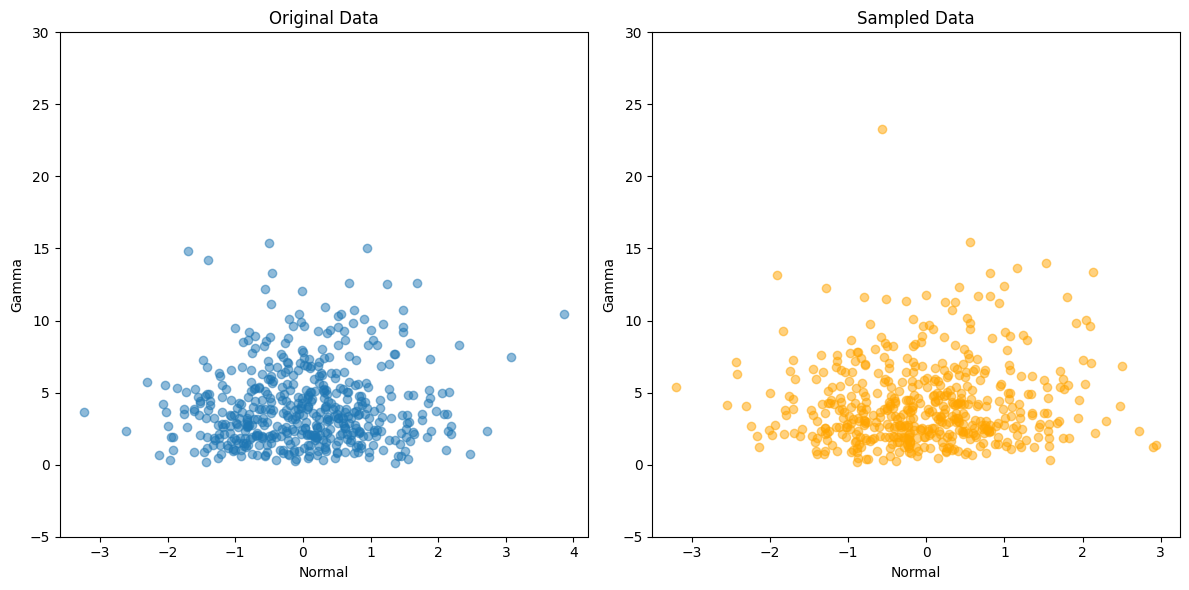

In [14]:
# 원래 데이터를 시각화합니다.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.ylim([-5,30])
plt.scatter(data['normal'], data['gamma'], alpha=0.5)
plt.title('Original Data')
plt.xlabel('Normal')
plt.ylabel('Gamma')

# 샘플링된 데이터를 시각화합니다.
plt.subplot(1, 2, 2)
plt.scatter(sampled_data['normal'], sampled_data['gamma'], alpha=0.5, color='orange')
plt.ylim([-5,30])
plt.title('Sampled Data')
plt.xlabel('Normal')
plt.ylabel('Gamma')

plt.tight_layout()
plt.show()